In [1]:
from physionet2023.dataProcessing.datasets import SampleDataset
import seaborn as sns

In [2]:
ds = SampleDataset("./data", sample_len=1000, shuffle=True)
eeg_data, static_data, label = ds[0]

# Dimensions of EEG data is (features_dim, timeseries_dim)
print(f"EEG channels (feature dimension): {ds.channels}")
print(f"EEG data shape: {eeg_data.shape}")
print()

# Static features:
# Age: age in years
# Sex: 1 male / 0 female
# ROSC: time from cardiac arrest to return of spontaneous circulation (minutes; 0.0 if unknown)
# OHCA: out of hospital cardiac arrest (1 if yes / 0 if no)
# VFib: 1 shockable rhythm / 0 non-shockable rhythm
# TTM: targeted temperature management (Celsius; 0.0 if none)
print(f"Static features: {ds.static_features.keys()}")
print(static_data)
print()

# Label is an ordinal 1 - 5 representing Cerebral Performance Category (CPC)
# 1 is best possible outcome; 5 is worst possible outcome
print(f"Label: {label}")

EEG channels (feature dimension): ['Fp1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 'Fp2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 'Fp1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'Fp2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'Fz-Cz', 'Cz-Pz']
EEG data shape: torch.Size([18, 1000])

Static features: dict_keys(['Age', 'Sex', 'ROSC', 'OHCA', 'VFib', 'TTM'])
tensor([67.,  1.,  0.,  1.,  1., 33.])

Label: 5.0


<AxesSubplot:>

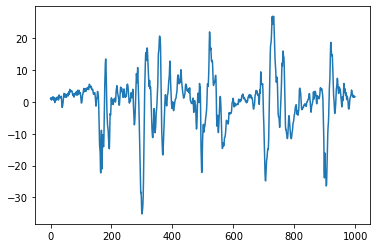

In [3]:
# Plot one of the 18 available EEG channels
sns.lineplot(x=range(0, eeg_data.shape[-1]), y=eeg_data[0,:])

In [4]:
# Demo using the dataloader with the built-in collate function
import torch

DL_DEMO_LIMIT = 3

dl = torch.utils.data.DataLoader(
    ds,
    num_workers=2,
    batch_size=4,
    # Built-in collate function adds static features as constant time-series features
    collate_fn=ds.collate,
    pin_memory=True,
)

for batchnum, (X, Y) in enumerate(dl):
    # Dimensions of X is (batch_size, n_features, sequence_length)
    # n_features = n_channels + n_static_features 
    print(f"Batch number: {batchnum}")
    print(f"X shape: {X.shape}")
    print(f"Y: {Y}")
    print()

    if batchnum == DL_DEMO_LIMIT:
        break


Batch number: 0
X shape: torch.Size([4, 24, 1000])
Y: tensor([5., 1., 2., 5.])

Batch number: 1
X shape: torch.Size([4, 24, 1000])
Y: tensor([3., 5., 1., 5.])

Batch number: 2
X shape: torch.Size([4, 24, 1000])
Y: tensor([5., 5., 5., 3.])

Batch number: 3
X shape: torch.Size([4, 24, 1000])
Y: tensor([5., 1., 1., 5.])

